In [24]:
import numpy as np
import jPCA
import matplotlib.pyplot as plt
from jPCA.util import load_churchland_data, plot_projections

In [26]:
class JPCA_calc:
    def __init__(self, B, tstart=0.05, tend=0.75, circle_size=0.005, arrow_size=0.005) -> None:
        datasB, timesB = load_churchland_data(B)

        # Create a jPCA object
        jpca = jPCA.JPCA(num_jpcs=6)

        self.jpca = jpca
        self.circle_size = circle_size
        self.arrow_size = arrow_size

        # Fit the jPCA object to data
        (projected, 
         full_data_var,
         pca_var_capt,
         jpca_var_capt) = jpca.fit(datasB, times=timesB, tstart=tstart, tend=tend)

        self.full_data_var = full_data_var
        self.pca_var_capt = pca_var_capt
        self.jpca_var_capt = jpca_var_capt

        freq = self.get_eigen()
        var = self.get_variance()

        # Plot projections for the first plane
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

        plot_projections(
            projected,
            circles=1,
            circle_size=self.circle_size,
            arrow_size=self.arrow_size,
            axis=ax,
            x_idx=0,
            y_idx=1,
        )
        ax.set_title("jPCA Plane 1")
        ax.annotate(
            f"Var: {var[0]:.2f}, Freq: {freq[0]:.2f}", 
            xy=(0.5, 1.1), 
            xycoords="axes fraction", 
            ha="center", 
            fontsize=10,
        )

        plt.tight_layout()
        plt.show()

    def get_variance(self):
        variance_ratios = self.jpca_var_capt / self.full_data_var
        paired_sums = [variance_ratios[i] + variance_ratios[i + 1] for i in range(0, len(variance_ratios) - 1, 2)]
        return paired_sums

    def get_eigen(self):
        # Compute eigenvalues and angular frequencies
        angular_speeds = np.abs(np.round(np.linalg.eigvals(self.jpca.M_skew), 3))
        frequencies = angular_speeds / (2 * np.pi) 
        frequencies = frequencies * 100  # Convert to seconds
        return frequencies

# Neural Data

data/OG_Model_Neural_Data.mat


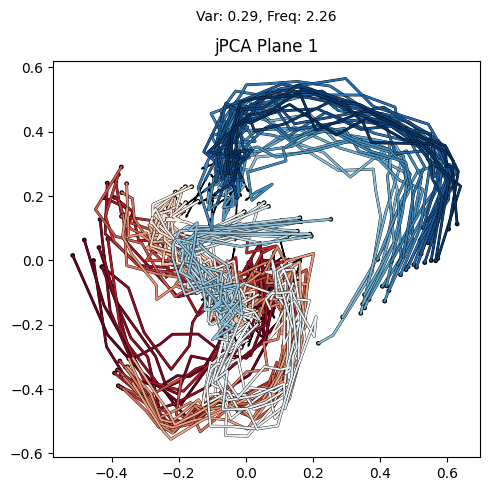

variance:  0.9539783191588709
frequency:  [2.26000019 2.26000019 0.92309867 0.92309867 0.09549297 0.09549297]
data/lstm_neural_data.mat


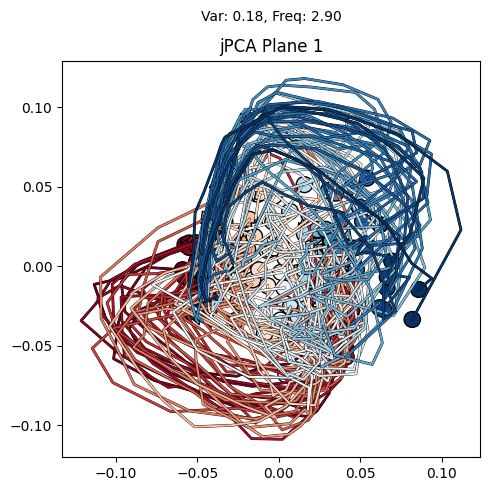

variance:  0.8664290642019453
frequency:  [2.89661996 2.89661996 0.90718318 0.90718318 0.11140846 0.11140846]
data/lstm_2_layers_neural_data.mat


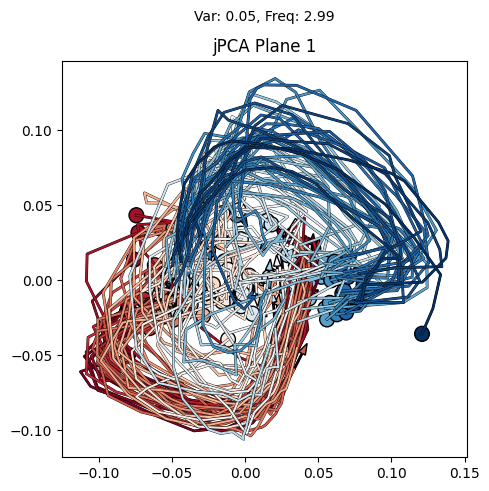

variance:  0.9700700617645882
frequency:  [2.99211293 2.99211293 0.90718318 0.90718318 0.07957747 0.07957747]


In [28]:
A = "data/OG_Model_Neural_Data.mat"
B = "data/lstm_neural_data.mat"
C = "data/lstm_2_layers_neural_data.mat"

mats = [A, B, C]

for x in mats:
    print(x)
    neural = JPCA_calc(x)
    print("variance: ", np.sum(neural.get_variance()))
    print("frequency: ", neural.get_eigen())



# Muscle Activity Data

data/OG_Model_muscle_data.mat


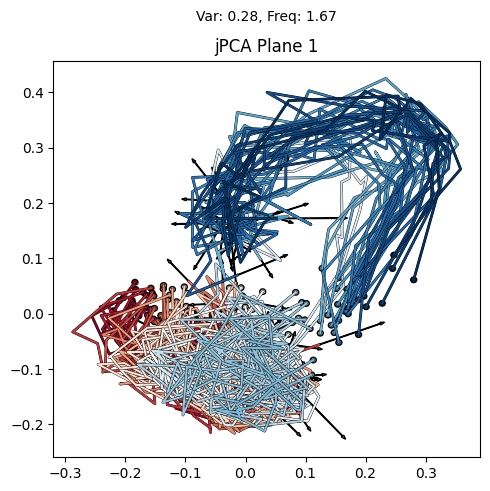

variance:  0.6847521905385066
frequency:  [1.6711269  1.6711269  0.23873241 0.23873241 0.49338032 0.49338032]
data/lstm_muscle_data.mat


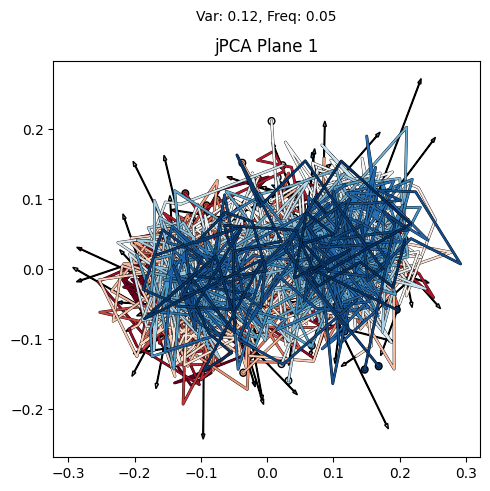

variance:  0.4044486242617243
frequency:  [0.04774648 0.04774648 0.52521131 0.52521131 0.46154933 0.46154933]
data/lstm_2_layers_muscle_data.mat


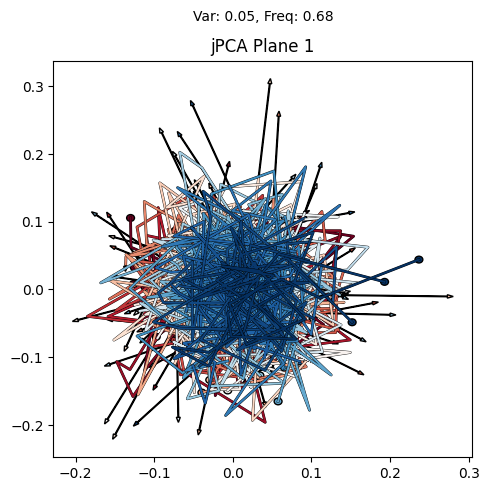

variance:  0.43917616730926023
frequency:  [0.68436626 0.68436626 0.36605637 0.36605637 0.03183099 0.03183099]


In [30]:
# Load publicly available data from Mark Churchland's group
A = "data/OG_Model_muscle_data.mat"
B = "data/lstm_muscle_data.mat"
C =  "data/lstm_2_layers_muscle_data.mat"

mats = [A, B, C]

for x in mats:
    print(x)
    neural = JPCA_calc(x)
    print("variance: ", np.sum(neural.get_variance()))
    print("frequency: ", neural.get_eigen())



# Joint/Fiber Data (Velocity and length)

data/OG_Model_fiber_joint_data.mat


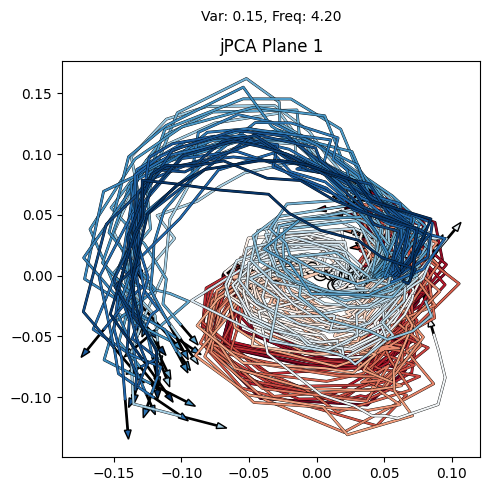

variance:  0.8622556992975886
frequency:  [4.2016905  4.2016905  0.97084515 0.97084515 0.03183099 0.03183099]
data/lstm_fiber_joint_data.mat


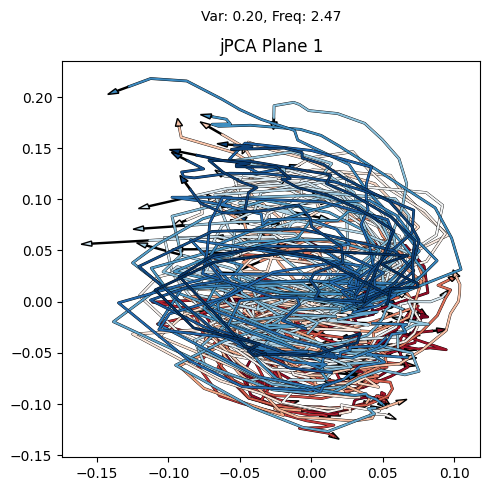

variance:  0.674011960676071
frequency:  [2.46690162 2.46690162 0.41380285 0.41380285 0.2864789  0.2864789 ]
data/lstm_2_layers_fiber_joint_data.mat


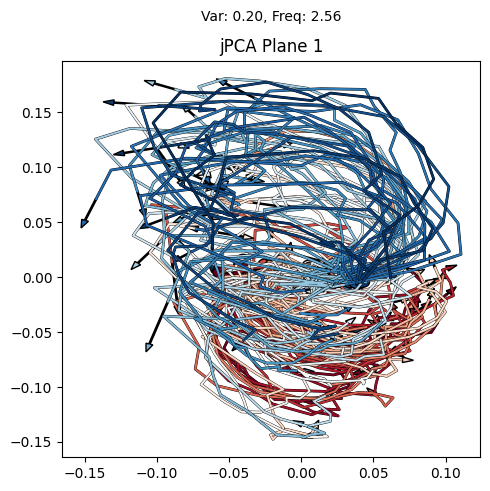

variance:  0.7316203622969728
frequency:  [2.56239458 2.56239458 0.49338032 0.49338032 0.         0.        ]


In [31]:
# Load publicly available data from Mark Churchland's group
A = "data/OG_Model_fiber_joint_data.mat"
B = "data/lstm_fiber_joint_data.mat"
C = "data/lstm_2_layers_fiber_joint_data.mat"

mats = [A, B, C]

for x in mats:
    print(x)
    neural = JPCA_calc(x)
    print("variance: ", np.sum(neural.get_variance()))
    print("frequency: ", neural.get_eigen())



# Fiber Data

data/OG_Model_fiber_Data.mat


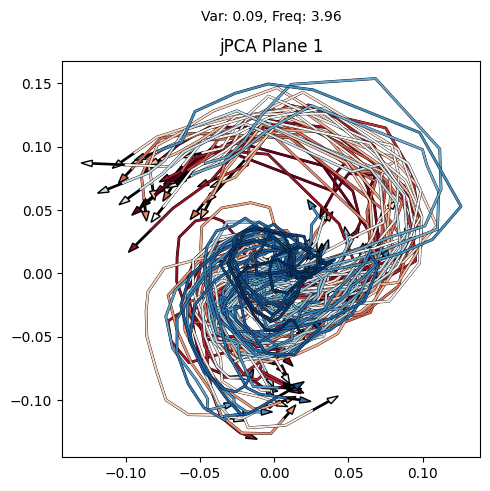

variance:  0.8929956464447917
frequency:  [3.96295808 3.96295808 1.06633812 1.06633812 0.14323945 0.14323945]
data/lstm_fiber_data.mat


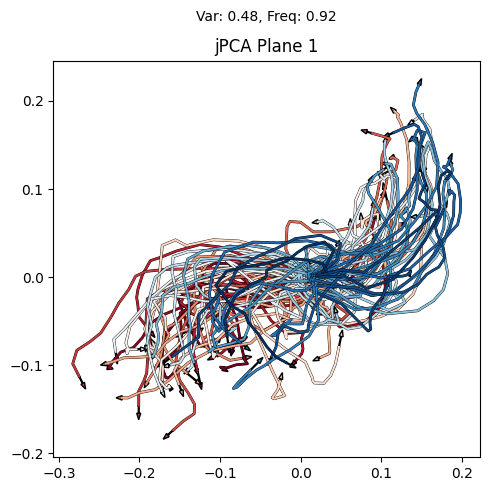

variance:  0.7256731908073208
frequency:  [0.92309867 0.92309867 0.38197186 0.38197186 0.06366198 0.06366198]
data/lstm_2_layers_fiber_data.mat


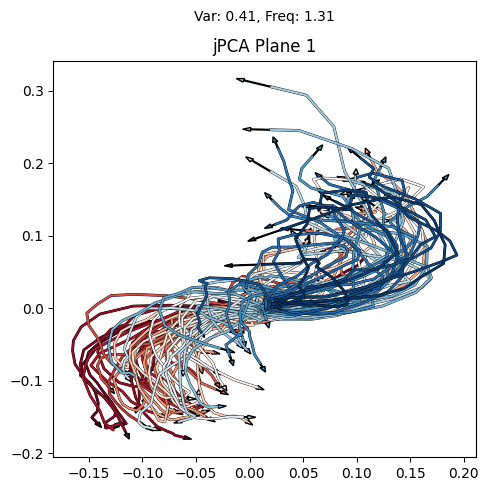

variance:  0.7737663438853615
frequency:  [1.30507053 1.30507053 0.52521131 0.52521131 0.01591549 0.01591549]


In [36]:
# Load publicly available data from Mark Churchland's group
A = "data/OG_Model_fiber_Data.mat"
B = "data/lstm_fiber_data.mat"
C = "data/lstm_2_layers_fiber_data.mat"


mats = [A, B, C]

for x in mats:
    print(x)
    neural = JPCA_calc(x)
    print("variance: ", np.sum(neural.get_variance()))
    print("frequency: ", neural.get_eigen())


# Joint Data

data/OG_Model_joint_Data.mat


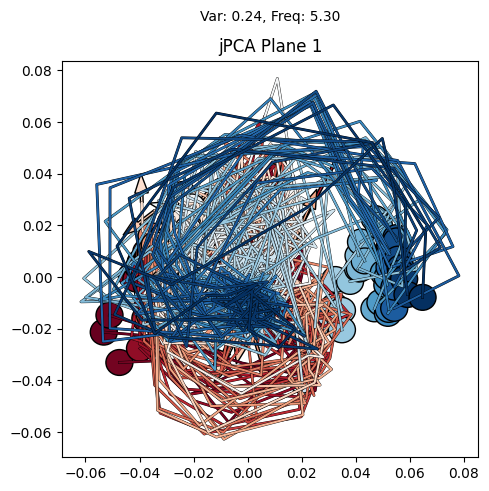

variance:  0.8029112043675957
frequency:  [5.2998596  5.2998596  3.24676084 3.24676084 0.8435212  0.8435212 ]
data/lstm_joint_data.mat


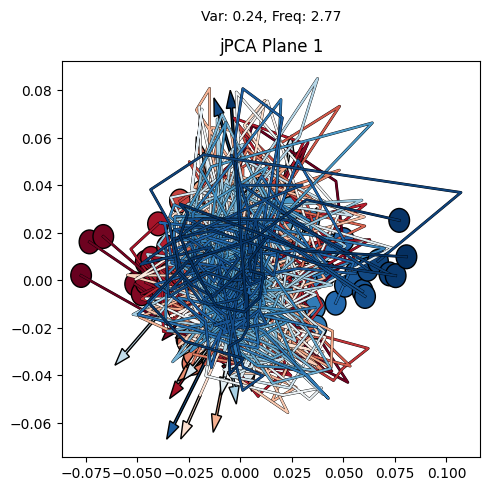

variance:  0.7683027897450837
frequency:  [2.76929601 2.76929601 1.71887339 1.71887339 0.         0.        ]
data/lstm_2_layers_joint_data.mat


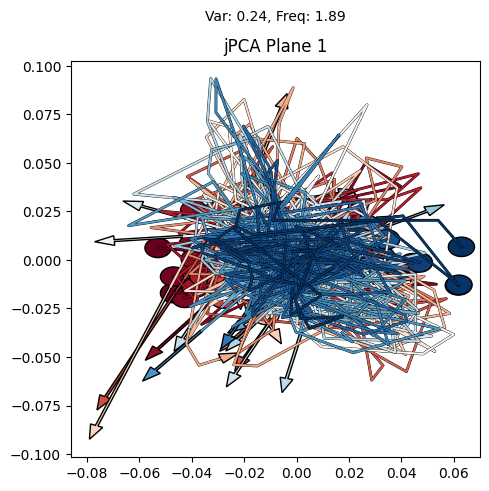

variance:  0.7749471409725686
frequency:  [1.89394382 1.89394382 1.25732405 1.25732405 0.12732395 0.12732395]


In [35]:
# Load publicly available data from Mark Churchland's group
A = "data/OG_Model_joint_Data.mat"
B = "data/lstm_joint_data.mat"
C = "data/lstm_2_layers_joint_data.mat"


mats = [A, B, C]

for x in mats:
    print(x)
    neural = JPCA_calc(x)
    print("variance: ", np.sum(neural.get_variance()))
    print("frequency: ", neural.get_eigen())

